<a href="https://colab.research.google.com/github/Pasindu-Madhuwantha/DL_LAB_02/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

Load the MNIST dataset

In [21]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [7 2 3 2 9 6 7 2 0 0]


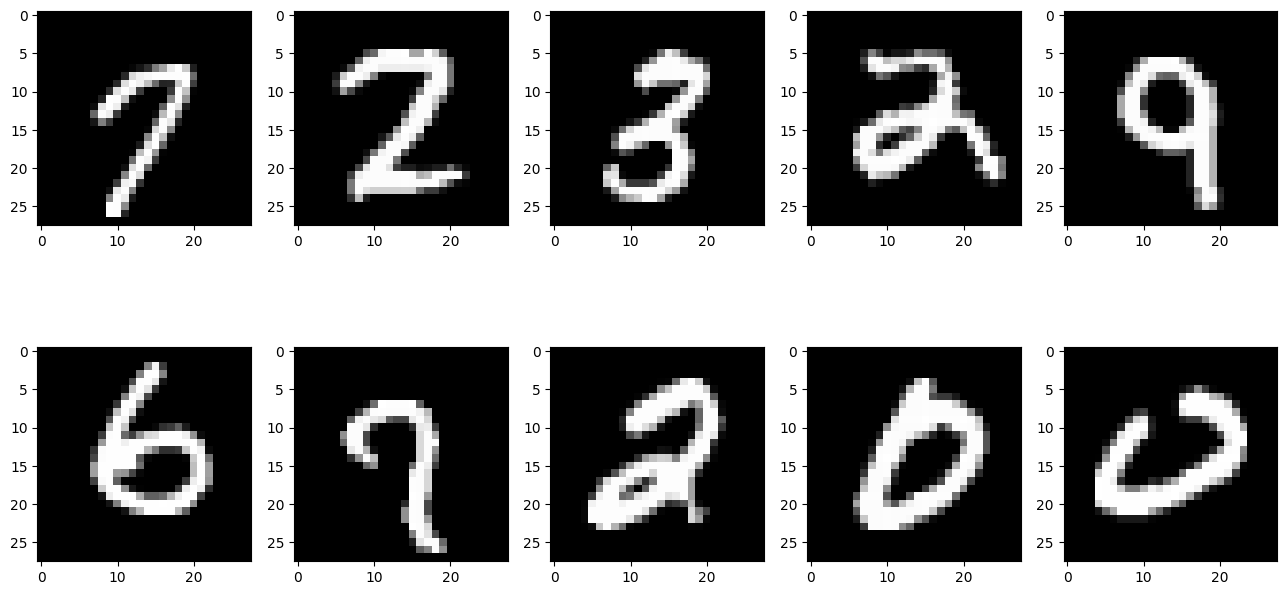

In [22]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [23]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Define a learning rate scheduler

In [24]:
def schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.95

Create the Model architecture

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile the model with learning rate scheduler
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(schedule)


In [26]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


Train the model

In [27]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2454 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1029 - accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0725 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0567 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0453 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0377 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0315 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0279 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0247 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.021

Plot the loss and accuracy graphs

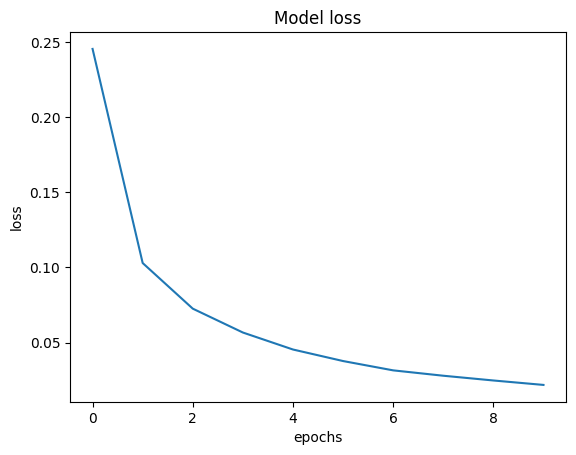

In [28]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

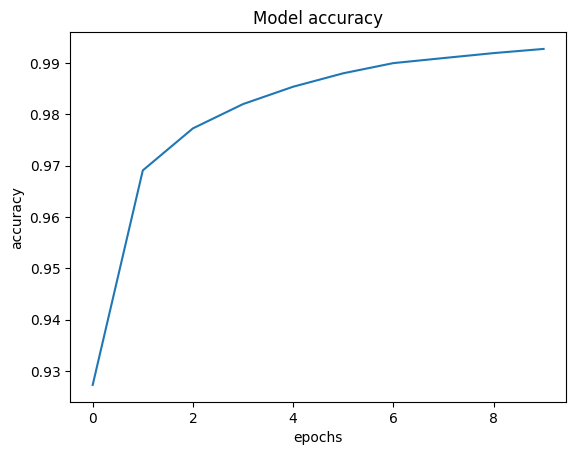

In [29]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [30]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9781
Loss of the Test dataset is: 0.09223642945289612
Accuracy of the test dataset is: 0.9781000018119812


Save the model weights

In [31]:
model.save_weights('MNIST_WEIGHTS_V1.h5')